In [ ]:
! pip install pandas

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("/content/combined_output_3.csv")

In [ ]:
df.head(10)

,YEAR,MONTH,DAY,MERRA-2 Temperature at 2 Meters (C),MERRA-2 Temperature at 2 Meters Range (C),MERRA-2 Temperature at 2 Meters Maximum (C),MERRA-2 Temperature at 2 Meters Minimum (C),MERRA-2 Precipitation Corrected (mm/day),MERRA-2 Relative Humidity at 2 Meters (%),MERRA-2 Specific Humidity at 2 Meters (g/kg),MERRA-2 Wind Speed at 10 Meters (m/s),Latitude,Longitude
0,1990,1,1,27.65,17.71,37.23,19.51,0.0,19.00,4.03,2.42,9.406,13.462
1,1990,1,2,27.87,17.19,37.21,20.01,0.0,19.12,3.91,1.84,9.406,13.462
2,1990,1,3,27.79,17.03,37.00,19.96,0.0,15.50,3.23,2.38,9.406,13.462
3,1990,1,4,26.89,18.41,36.40,17.99,0.0,19.50,4.03,2.56,9.406,13.462
4,1990,1,5,27.76,18.21,37.14,18.94,0.0,20.50,4.39,2.50,9.406,13.462
5,1990,1,6,27.62,15.62,35.90,20.28,0.0,21.19,4.82,4.22,9.406,13.462
6,1990,1,7,27.54,15.73,35.90,20.16,0.0,18.81,4.27,5.57,9.406,13.462
7,1990,1,8,27.88,16.22,36.61,20.39,0.0,17.94,4.09,5.43,9.406,13.462
8,1990,1,9,28.14,16.01,37.20,21.19,0.0,19.44,4.76,5.79,9.406,13.462
9,1990,1,10,27.76,17.90,37.49,19.58,0.0,15.62,3.54,6.80,9.406,13.462


In [ ]:
df = pd.read_csv("/content/combined_output_3.csv")

In [ ]:
df["date"] = pd.to_datetime(df[["YEAR", "MONTH", "DAY"]])

In [ ]:
df = df.rename(columns={
    "MERRA-2 Temperature at 2 Meters (C)": "temp_c",
    "MERRA-2 Precipitation Corrected (mm/day)": "precip_mm"
})

In [ ]:
def plot_trend(x, y, label, ylabel):
    slope, intercept, r, p, se = linregress(x, y)
    print(f"{label} trend: slope={slope:.3f}, p={p:.3f}, R²={r**2:.2f}")

    plt.figure(figsize=(8,5))
    plt.scatter(x, y, color="blue", label="Observed")
    plt.plot(x, intercept + slope*x, color="red",
             label=f"Trend line (slope={slope:.3f})")
    plt.xlabel("Year")
    plt.ylabel(ylabel)
    plt.title(f"Trend in {label} (1990–2023)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [ ]:
df = pd.read_csv('/content/combined_output_3.csv')


In [ ]:
df['date'] = pd.to_datetime(df[['YEAR','MONTH','DAY']])
df = df.sort_values('date').reset_index(drop=True)


In [ ]:
def theil_sen_slope(y):
    """Median of all pairwise slopes → robust to outliers"""
    n = len(y)
    slopes = []
    for i in range(n):
        for j in range(i+1, n):
            slopes.append((y[j] - y[i]) / (j - i))
    return np.median(slopes)

def mann_kendall(y):
    """Return Kendall S, variance, two-sided p-value"""
    n = len(y)
    s = 0
    for k in range(n-1):
        for j in range(k+1, n):
            s += np.sign(y[j] - y[k])
    var_s = n*(n-1)*(2*n+5)/18
    if s > 0:      z = (s - 1)/np.sqrt(var_s)
    elif s < 0:    z = (s + 1)/np.sqrt(var_s)
    else:          z = 0
    p = 2*(1 - norm.cdf(abs(z)))
    return s, var_s, p

In [ ]:
def trend_pandas(series, alpha=0.05):
    """
    series : pandas Series with DatetimeIndex
    returns: dict with slope (per year), intercept, mk_p, trend_flag
    """
    y = series.dropna().values
    x = np.arange(len(y))                      # 0,1,2,…
    slope_per_step = theil_sen_slope(y)
    intercept      = np.median(y - slope_per_step*x)

    # convert slope → “per year”
    dt_years = (series.index[-1] - series.index[0]).days / 365.25
    slope_per_year = slope_per_step * (len(y)-1) / dt_years

    _, _, mk_p = mann_kendall(y)
    trend_flag = 0
    if mk_p < alpha:
        trend_flag = 1 if slope_per_year > 0 else -1

    return {'slope_per_year': slope_per_year,
            'intercept'     : intercept,
            'mk_p'          : mk_p,
            'trend_flag'    : trend_flag}   # +1 up, -1 down, 0 none

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/combined_output_3.csv')


In [ ]:
!pip install -q pymannkendall   # for MK p-value

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata, norm   # for MK test

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

annual = ts.resample('Y').mean()
trend  = out['intercept'] + out['slope_per_year']*(annual.index.year - annual.index.year[0])

plt.figure(figsize=(8,3))
plt.plot(annual.index, annual, label='annual mean', lw=1.2)
plt.plot(annual.index, trend, label=f'trend = {out["slope_per_year"]:.3f} mm day⁻¹ yr⁻¹', ls='--')
plt.title(f'Trend analysis – {col}')
plt.legend(); plt.show()

/tmp/ipython-input-607845147.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual = ts.resample('Y').mean()


NameError: name 'out' is not defined

In [ ]:
df['date'] = pd.to_datetime(df[['YEAR','MONTH','DAY']])
df = df.set_index('date')

# Select a column to create the time series (e.g., precipitation)
col = 'MERRA-2 Precipitation Corrected (mm/day)'
ts = df[col]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [ ]:
df = pd.read_csv("combined_output_3.csv")

In [ ]:
df["date"] = pd.to_datetime(df[["YEAR", "MONTH", "DAY"]])

In [ ]:
df = df.rename(columns={
    "MERRA-2 Temperature at 2 Meters (C)": "temp_c",
    "MERRA-2 Precipitation Corrected (mm/day)": "precip_mm"
})

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
 df = pd.read_csv("/content/combined_output_3.csv")

In [ ]:
df['Date'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.columns = df.columns.str.strip()
temperature_column = 'MERRA-2 Temperature at 2 Meters (C)'

In [ ]:
if temperature_column not in df.columns:
            print(f"Error: Column '{temperature_column}' not found in the DataFrame.")
            print("Please check the column names in your CSV file.")

In [ ]:
rolling_mean_temp = df[temperature_column].rolling(window=365).mean()

In [ ]:
monthly_mean_temp = df[temperature_column].resample('M').mean()

/tmp/ipython-input-2150557448.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_temp = df[temperature_column].resample('M').mean()


In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 7))

<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

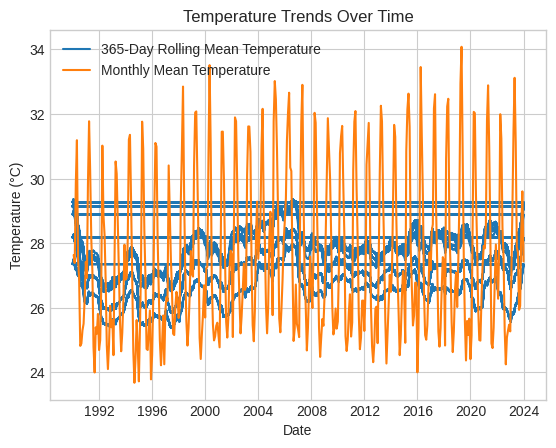

In [ ]:
plt.plot(rolling_mean_temp.index, rolling_mean_temp, label='365-Day Rolling Mean Temperature')
plt.plot(monthly_mean_temp.index, monthly_mean_temp, label='Monthly Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends Over Time')
plt.legend()
plt.show()